<h1 align='center' style="color:#008c73;"> MNIST Handwritten Digit Classification Dataset </h1>

* The `MNIST dataset` is an acronym that stands for the `Modified National Institute of Standards and Technology dataset`.

* It is a dataset of `60,000` small square `28×28` pixel grayscale images of handwritten single digits between `0 and 9`.

<b style="color:red;">Task:</b> classify a given image of a handwritten digit into one of `10 classes` representing integer values from `0 to 9`, inclusively.
<img src="https://live.staticflickr.com/65535/51179622819_fd50668be9_o.png" width="640" height="16" alt="Divider Line">

<h2 align='center' style="color:#9a159f;"> Setting up the Environment </h2>

In [ ]:
#------------------------------- TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
print("TensorFlow Version :" ,tf.__version__)

#------------------------------- Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


TensorFlow Version : 2.4.1


<h2 align='center' style="color:#9a159f;"> Importing the Dataset </h2>


In [ ]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

<h2 align='center' style="color:#9a159f;">  Data Analysis </h2>
<img src="https://live.staticflickr.com/65535/51177056047_3648a68e8c_z.jpg">


In [ ]:
print("Training Images Size and Shape", x_train.shape,y_train.shape)

print("Testing Images Size and Shape", x_test.shape,y_test.shape)

Training Images Size and Shape (60000, 28, 28) (60000,)
Testing Images Size and Shape (10000, 28, 28) (10000,)


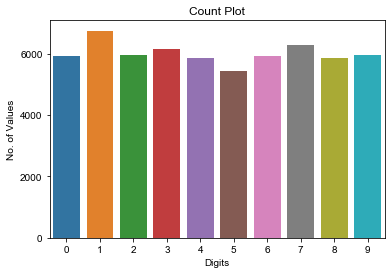

In [ ]:
ax = sns.countplot(y_train)
ax.set(xlabel ="Digits", ylabel = "No. of Values", title ='Count Plot');
sns.set(font_scale=1.3)

In [ ]:
# Training Data Unique Values and unique Values count

unique_val_train, unique_val_count_train = np.unique(y_train, return_counts=True)
unique_train_dict = dict(zip(unique_val_train, unique_val_count_train))
print(unique_train_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


<b> In Training data each digit total count is near to `6000`. All digits have same range of training data. So with this data model cant biased. </b>

In [ ]:
# Testing Data Unique Values and unique Values count

unique_val_test, unique_val_count_test = np.unique(y_test, return_counts=True)
unique_test_dict = dict(zip(unique_val_test, unique_val_count_test))
unique_test_dict

{0: 980,
 1: 1135,
 2: 1032,
 3: 1010,
 4: 982,
 5: 892,
 6: 958,
 7: 1028,
 8: 974,
 9: 1009}

In [ ]:
# Created a List with Digit Names
digit_names = ['0','1','2','3','4','5','6','7','8','9']

<h3 style="color:blue;"> Checking the one sample image from the Data </h3>

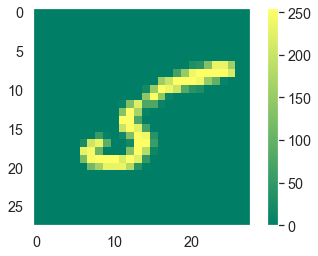

In [ ]:
plt.figure()
plt.imshow(x_train[11], cmap='summer')
plt.colorbar()
plt.grid()
plt.show()

In [ ]:
y_train[11]

5

In [ ]:
x_train[11].min(), x_train[11].max()  # x_train Pixel Range

(0, 255)

In [ ]:
unique_val_11, unique_val_count_11 = np.unique(x_train[11], return_counts=True)
unique_val_11, unique_val_count_11

# This step clearly showing that the image colors are varying from 0 to 255. 
# As per our fundamentals we know that the color values range is between 0 to 255. 
# With this we clearly checked the colors range

(array([  0,   3,   6,   8,  10,  12,  14,  18,  19,  20,  25,  30,  31,
         39,  40,  41,  50,  55,  58,  68,  69,  78,  79,  83,  92,  98,
        108, 116, 121, 128, 129, 132, 134, 144, 145, 150, 154, 156, 159,
        165, 167, 180, 185, 201, 203, 205, 215, 217, 222, 223, 226, 231,
        233, 234, 235, 236, 239, 241, 245, 253, 254, 255], dtype=uint8),
 array([693,   1,   1,   3,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          2,   1,   1,   1,   1,   1,   1,   1,   2,   1,   1,   1,   1,
          1,   1,   1,   1,   2,   1,   1,   1,   1,   2,   1,   1,   1,
          1,   1,   1,   1,   2,   1,   1,   1,   1,   1,   1,   1,   1,
          2,   3,   1,   1,   1,   2,   2,  10,  10,   1], dtype=int64))

<img src="https://live.staticflickr.com/65535/51177056047_3648a68e8c_z.jpg">
<h2 align='center' style="color:#9a159f;">  Preprocessing the Data</h2>

The data must be preprocessed before training the network. If you inspect the <b> y_train[11] </b> image in the training set, you will see that the pixel values fall in the range of 0 to 255:

Before Preprocessing the Data checking the One Image from the Data


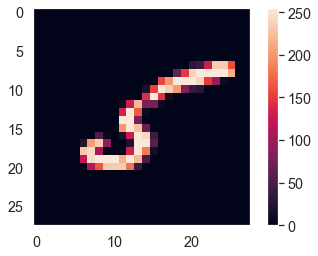

In [ ]:
print("Before Preprocessing the Data checking the One Image from the Data")
plt.figure()
plt.imshow(x_train[11])
plt.colorbar()
plt.grid()
plt.show()

* Images are comprised of matrices of pixel values.

* Pixel values are often unsigned integers in the range between `0 and 255 `. Although these pixel values can be presented directly to neural network models in their raw format, this can result in challenges during modeling, such as in the slower than expected training of the model.

* Instead, there can be great benefit in preparing the image pixel values prior to modeling, such as simply scaling pixel values to the range <b>0-1</b> to centering and even standardizing the values.

* Neural networks process inputs using small weight values, and inputs with large integer values can disrupt or slow down the learning process. As such it is good practice to normalize the pixel values so that each pixel value has a value between 0 and 1.

#### This can be achieved by dividing all pixels values by the largest pixel value; that is 255
<img src="https://live.staticflickr.com/65535/51177056047_3648a68e8c_z.jpg">

### <b>Preprocessing:</b>

In [ ]:
x_train = x_train / 255.0         # Training Data

x_test = x_test / 255.0           # Testing Data

### Checking the changes After Preprocessing 

After Preprocessed the Data checking the same x_train[11] Image from the Data


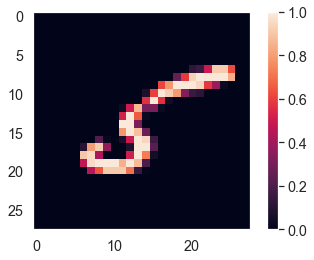

In [ ]:
print("After Preprocessed the Data checking the same x_train[11] Image from the Data")
plt.figure()
plt.imshow(x_train[11])
plt.colorbar()
plt.grid()
plt.show()

In [ ]:
x_train[11].min(), x_train[11].max()  # Pixel range after Preprocessing

(0.0, 1.0)

In [ ]:
# Checking Pixcel Ranges
print("Pixcel Range Before and After Preprocessing the Data: " , '\n', )
unique_val_11_pre = np.unique(x_train[11])

print("Before Preprocessing the Data checking the x_train[11] Image pixel values:", '\n')
print(unique_val_11, '\n')

print("After Preprocessing the Data checking the same x_train[11] Image pixel values:", '\n')
print(unique_val_11_pre)


Pixcel Range Before and After Preprocessing the Data:  

Before Preprocessing the Data checking the x_train[11] Image pixel values: 

[  0   3   6   8  10  12  14  18  19  20  25  30  31  39  40  41  50  55
  58  68  69  78  79  83  92  98 108 116 121 128 129 132 134 144 145 150
 154 156 159 165 167 180 185 201 203 205 215 217 222 223 226 231 233 234
 235 236 239 241 245 253 254 255] 

After Preprocessing the Data checking the same x_train[11] Image pixel values: 

[0.         0.01176471 0.02352941 0.03137255 0.03921569 0.04705882
 0.05490196 0.07058824 0.0745098  0.07843137 0.09803922 0.11764706
 0.12156863 0.15294118 0.15686275 0.16078431 0.19607843 0.21568627
 0.22745098 0.26666667 0.27058824 0.30588235 0.30980392 0.3254902
 0.36078431 0.38431373 0.42352941 0.45490196 0.4745098  0.50196078
 0.50588235 0.51764706 0.5254902  0.56470588 0.56862745 0.58823529
 0.60392157 0.61176471 0.62352941 0.64705882 0.65490196 0.70588235
 0.7254902  0.78823529 0.79607843 0.80392157 0.84313725 0.8509

> So the above step clearly showing that after the preprocessing the data the image pixels range are chenged from <b>(0 to 255) to (0 to 1)

### Trying to print all the digits images at one place

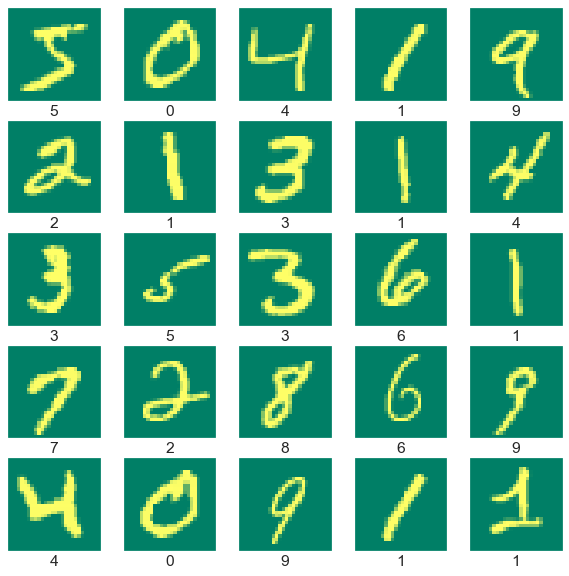

In [ ]:
digit_names = ['0','1','2','3','4','5','6','7','8','9']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([]) 
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap='summer')
    plt.xlabel(digit_names[y_train[i]])
plt.show()

<img src="https://live.staticflickr.com/65535/51177056047_3648a68e8c_z.jpg">
<h1 align='center' style="color:#9a159f;">  Constructing the model </h1>
<img src="https://live.staticflickr.com/65535/51179715169_72c11a424c_o.png" width="320" height="291" alt="pngkey.com-technology-icon-png-8762622">
Building the neural network requires configuring the layers of the model, then compiling the model.

<h3 style="color:blue;"> <u>Set up the layers</u> : </h3>

The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as tf.keras.layers.Dense, have parameters that are learned during training.

In [ ]:
# Creating Basic Model with Layers

base_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely connected, or fully connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

#### Available activation Functions
* relu function
* sigmoid function
* softmax function
* softplus function
* softsign function
* tanh function
* selu function
* elu function
* exponential function

`A neural network without an activation function is essentially just a linear regression model.`

<b> We used `relu` and `softmax` activation Functions</b>

<p style="font-size:20px;">
<img src="https://live.staticflickr.com/65535/51179155168_fc45e1bbca_o.png" style="float:left;width:22px;height:22px;">
    <b style="color:blue;">Compile the model</b>
</p>



Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

* `Loss function` —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* `Optimizer` —This is how the model is updated based on the data it sees and its loss function.
* `Metrics` —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [ ]:
base_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

<p style="font-size:20px;">
<img src="https://live.staticflickr.com/65535/51179171413_63ea6a9878_o.png" style="float:left;width:42px;height:42px;">
    <b style="color:blue;">Train the model</b>
</p>
Training the neural network model requires the following steps:

    * Feed the training data to the model. In this example, the training data is in the x_train and y_train arrays.
    * The model learns to associate images and labels.
To start training, call the model.fit method—so called because it "fits" the model to the training data:

In [ ]:
base_model.fit(x_train, y_train, epochs=10, batch_size=5);

Epoch 1/10
12000/12000 [==============================] - 9s 671us/step - loss: 0.3200 - accuracy: 0.9029
Epoch 2/10
12000/12000 [==============================] - 8s 640us/step - loss: 0.1016 - accuracy: 0.9683
Epoch 3/10
12000/12000 [==============================] - 8s 640us/step - loss: 0.0761 - accuracy: 0.9766
Epoch 4/10
12000/12000 [==============================] - 8s 646us/step - loss: 0.0572 - accuracy: 0.9829
Epoch 5/10
12000/12000 [==============================] - 9s 727us/step - loss: 0.0501 - accuracy: 0.9846
Epoch 6/10
12000/12000 [==============================] - 11s 905us/step - loss: 0.0435 - accuracy: 0.9866
Epoch 7/10
12000/12000 [==============================] - 10s 811us/step - loss: 0.0376 - accuracy: 0.9895
Epoch 8/10
12000/12000 [==============================] - 9s 747us/step - loss: 0.0354 - accuracy: 0.9888
Epoch 9/10
12000/12000 [==============================] - 8s 692us/step - loss: 0.0354 - accuracy: 0.9910
Epoch 10/10
12000/12000 [===================

>As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.99 (or 99%) on the training data.

<p style="font-size:20px;">
<img src="https://live.staticflickr.com/65535/51178283347_e1a9416536_o.png" style="float:left;width:42px;height:42px;"><br>
    <b style="color:blue;">Evaluating the model accuracy</b>
</p>
Next, compare how the model performs on the test dataset:

In [ ]:
loss_base,acc_base = base_model.evaluate(x_test,  y_test)

print('\nTest accuracy:', acc_base)

313/313 [==============================] - 0s 538us/step - loss: 0.1595 - accuracy: 0.9747

Test accuracy: 0.9746999740600586


### Model Analysis:

* The model trained well with accuracy: 0.9912 but it does not generalize well on Testing Data
* Model testing accuracy is 0.9788
* There is value difference between Training accuracy and Testing Accuracy

`So Model is Overfitting`

<b style="color:green;"><i>To Reduce the Model overfitting we followed below steps:</i></b>

<b style="color:red;">No</b> | <b style="color:red;">Tunning Technique</b>
---|-----------
<i>Tunning 1</i>| <b>Simplifying the model</b>
<i>Tunning 2</i>| <b>Adding Dropout</b>
<i>Tunning 3</i>| <b>Droped One Activation funtion</b>
<i>Tunning 4</i>| <b>Call Back with Early Stoping</b>

### Tunning the Model

#### Tunning 1: Simplifying the model
* The first step when dealing with overfitting is to decrease the complexity of the model. In the given base model, there are 3 hidden Layers, Two with 128 and one with 10 neurons.To decrease the complexity, we can simply remove layers or reduce the number of neurons in order to make our network smaller.

In [ ]:
model_tune1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
model_tune1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model_tune1.fit(x_train, y_train, epochs=10, batch_size=5);
print('\n')
loss1,acc1 = model_tune1.evaluate(x_test,  y_test)

print('\nTest accuracy:', acc1)

Epoch 1/10
12000/12000 [==============================] - 7s 589us/step - loss: 0.3242 - accuracy: 0.9011
Epoch 2/10
12000/12000 [==============================] - 7s 603us/step - loss: 0.1023 - accuracy: 0.9683
Epoch 3/10
12000/12000 [==============================] - 7s 602us/step - loss: 0.0710 - accuracy: 0.9783
Epoch 4/10
12000/12000 [==============================] - 7s 611us/step - loss: 0.0577 - accuracy: 0.9815
Epoch 5/10
12000/12000 [==============================] - 7s 616us/step - loss: 0.0505 - accuracy: 0.9851
Epoch 6/10
12000/12000 [==============================] - 7s 617us/step - loss: 0.0417 - accuracy: 0.9874
Epoch 7/10
12000/12000 [==============================] - 8s 672us/step - loss: 0.0376 - accuracy: 0.9881
Epoch 8/10
12000/12000 [==============================] - 8s 656us/step - loss: 0.0325 - accuracy: 0.9906
Epoch 9/10
12000/12000 [==============================] - 8s 663us/step - loss: 0.0285 - accuracy: 0.9912
Epoch 10/10
12000/12000 [=====================

#### Again Model Overfitting

#### Tunning 2: 
* Dropout Layers can be an easy and effective way to prevent overfitting in your models. A dropout layer randomly drops some of the connections between layers. This helps to prevent overfitting, because if a connection is dropped, the network is forced to Luckily, with keras it’s really easy to add a dropout layer.

In [ ]:
model_tune2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10)
])
model_tune2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model_tune2.fit(x_train, y_train, epochs=10, batch_size=5);
print('\n')
loss1,acc1 = model_tune2.evaluate(x_test,  y_test)

print('\nTest accuracy:', acc1)

Epoch 1/10
12000/12000 [==============================] - 33s 3ms/step - loss: 0.5039 - accuracy: 0.8446
Epoch 2/10
12000/12000 [==============================] - 34s 3ms/step - loss: 0.2747 - accuracy: 0.9274
Epoch 3/10
12000/12000 [==============================] - 34s 3ms/step - loss: 0.2576 - accuracy: 0.9366
Epoch 4/10
12000/12000 [==============================] - 34s 3ms/step - loss: 0.2570 - accuracy: 0.9379
Epoch 5/10
12000/12000 [==============================] - 34s 3ms/step - loss: 0.2409 - accuracy: 0.9443
Epoch 6/10
12000/12000 [==============================] - 36s 3ms/step - loss: 0.2484 - accuracy: 0.9436
Epoch 7/10
12000/12000 [==============================] - 37s 3ms/step - loss: 0.2442 - accuracy: 0.9466
Epoch 8/10
12000/12000 [==============================] - 35s 3ms/step - loss: 0.2446 - accuracy: 0.9468
Epoch 9/10
12000/12000 [==============================] - 35s 3ms/step - loss: 0.2369 - accuracy: 0.9495
Epoch 10/10
12000/12000 [==============================

#### Now the Result is fine. But we try to increase the Accuracy by doing Tunning 

#### Tunning 3 :
* Droped One Activation funtion
* Added Two Dropout Layers
* Tacken Two 512 neurons Layers

In [ ]:
model_tune3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10)
])
model_tune3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model_tune3.fit(x_train, y_train, epochs=10, batch_size=5)
print('\n')
loss1,acc1 = model_tune3.evaluate(x_test,  y_test)

print('\nTest accuracy:', acc1)

Epoch 1/10
12000/12000 [==============================] - 36s 3ms/step - loss: 0.4982 - accuracy: 0.8453
Epoch 2/10
12000/12000 [==============================] - 35s 3ms/step - loss: 0.2698 - accuracy: 0.9274
Epoch 3/10
12000/12000 [==============================] - 35s 3ms/step - loss: 0.2530 - accuracy: 0.9370
Epoch 4/10
12000/12000 [==============================] - 35s 3ms/step - loss: 0.2487 - accuracy: 0.9414
Epoch 5/10
12000/12000 [==============================] - 35s 3ms/step - loss: 0.2388 - accuracy: 0.9445
Epoch 6/10
12000/12000 [==============================] - 35s 3ms/step - loss: 0.2449 - accuracy: 0.9438
Epoch 7/10
12000/12000 [==============================] - 35s 3ms/step - loss: 0.2413 - accuracy: 0.9471
Epoch 8/10
12000/12000 [==============================] - 35s 3ms/step - loss: 0.2328 - accuracy: 0.9495
Epoch 9/10
12000/12000 [==============================] - 35s 3ms/step - loss: 0.2532 - accuracy: 0.9495
Epoch 10/10
12000/12000 [==============================

#### No use with above tunning method
#### Tunning 4 :
* Droped One Activation funtion to the main model
* Added Two Dropout Layers
* Added one 512 neurons Layer, One 256 neurons Layer, One 10 neurons Layer
* Used callback function with Early Stopping
   > <i>Another way to prevent overfitting is to stop your training process early: Instead of training for a fixed number of epochs, you stop as soon as the validation loss rises — because, after that, your model will generally only get worse with more training.</i>
* Increased Epochs size to the model fitting function by 35

In [ ]:
model_tune4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10)
])
model_tune4.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
es_callback = keras.callbacks.EarlyStopping(monitor='loss', patience=5)

model_tune4.fit(x_train, y_train, epochs=35, batch_size=10, callbacks=[es_callback])

Epoch 1/35
6000/6000 [==============================] - 15s 2ms/step - loss: 0.4426 - accuracy: 0.8626
Epoch 2/35
6000/6000 [==============================] - 15s 3ms/step - loss: 0.1759 - accuracy: 0.9497
Epoch 3/35
6000/6000 [==============================] - 15s 2ms/step - loss: 0.1484 - accuracy: 0.9585
Epoch 4/35
6000/6000 [==============================] - 16s 3ms/step - loss: 0.1344 - accuracy: 0.9629
Epoch 5/35
6000/6000 [==============================] - 15s 3ms/step - loss: 0.1277 - accuracy: 0.9646
Epoch 6/35
6000/6000 [==============================] - 14s 2ms/step - loss: 0.1135 - accuracy: 0.9674
Epoch 7/35
6000/6000 [==============================] - 16s 3ms/step - loss: 0.1105 - accuracy: 0.9694
Epoch 8/35
6000/6000 [==============================] - 15s 3ms/step - loss: 0.1137 - accuracy: 0.9702
Epoch 9/35
6000/6000 [==============================] - 15s 2ms/step - loss: 0.1093 - accuracy: 0.9727
Epoch 10/35
6000/6000 [==============================] - 15s 2ms/step - l

In [ ]:
loss_4,acc_4 = model_tune4.evaluate(x_test,  y_test)

print('\nTest accuracy:', acc_4, '\nTest Loss:', loss_4)

313/313 [==============================] - 1s 1ms/step - loss: 0.1378 - accuracy: 0.9812

Test accuracy: 0.9811999797821045 
Test Loss: 0.13779640197753906


### <b style="color:green;">Finally we reached  to the good Accuracy Score</b>
<img src="https://live.staticflickr.com/65535/51177069187_258efa33f7_o.png" width="320" height="267">
<p>
<img src="https://live.staticflickr.com/65535/51178283347_e1a9416536_o.png" style="float:left;width:42px;height:42px;"><br>
    <b style="color:blue;">Evaluating the model accuracy</b></br>
</p>


<p>Now the Model is not Overfitting and Not Underfitting, and also we got good accuracy (98.13)</p>

<b>Conclusion:</b>

As shown above, all three options help to reduce overfitting. We manage to increase the accuracy on the test data substantially. Among these three options, the model with the Dropout layers and Early Stopping performs the best on the test data.

# Now Finalizing the Model
<b style="color:red;">Model name </b>|<b style="color:blue;">Training Accuracy</b>|<b style="color:green;">Testing Accuracy</b>
-----------|------------------|------------------
Base Model |99.11|97.43
model_tune1|99.22|97.61
model_tune2|94.91|97.04
model_tune3|94.91|97.18
model_tune4|98.23|98.22

* From the above tunning methods the last method given good accuracy_score for both Training and Testing Accuracy
* And the Both Training and Testing accuracy are almost qual with very less difference. So Overfitting and Underfitting is not happened for this model
* The model_tune4 model given best performance so that we are selecting this model as our best and Final model

### Final Model Creation Using model_tune4 model

In [ ]:
# Model Creation 
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10)
])

# Compiler Creation for the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Training the Final Model

In [ ]:
# Using call back method

callback_es = keras.callbacks.EarlyStopping(monitor='loss', patience=5)

# Training the model with epochs=35, batch_size=10 and also used callbacks

# Here we are storing the Training, Testing loss and accuracy into the model_history

model_history = model.fit(x_train, y_train, validation_data = (x_test,y_test), 
                          epochs=35, batch_size=10, callbacks=[callback_es])

Epoch 1/35
6000/6000 [==============================] - 15s 2ms/step - loss: 0.0943 - accuracy: 0.9797 - val_loss: 0.1308 - val_accuracy: 0.9818
Epoch 2/35
6000/6000 [==============================] - 15s 2ms/step - loss: 0.0871 - accuracy: 0.9807 - val_loss: 0.1384 - val_accuracy: 0.9821
Epoch 3/35
6000/6000 [==============================] - 15s 3ms/step - loss: 0.0905 - accuracy: 0.9823 - val_loss: 0.1474 - val_accuracy: 0.9819
Epoch 4/35
6000/6000 [==============================] - 17s 3ms/step - loss: 0.0904 - accuracy: 0.9815 - val_loss: 0.1409 - val_accuracy: 0.9801
Epoch 5/35
6000/6000 [==============================] - 22s 4ms/step - loss: 0.0789 - accuracy: 0.9829 - val_loss: 0.1381 - val_accuracy: 0.9825
Epoch 6/35
6000/6000 [==============================] - 20s 3ms/step - loss: 0.0905 - accuracy: 0.9819 - val_loss: 0.1260 - val_accuracy: 0.9831
Epoch 7/35
6000/6000 [==============================] - 21s 4ms/step - loss: 0.0889 - accuracy: 0.9815 - val_loss: 0.1726 - val_ac

## Evaluating the final model

Result: 
* Training accuracy is <b>`98.14`</b> and Testing Accuracy is <b>`98.14`</b>

In [ ]:
loss, acc = model.evaluate(x_test,  y_test)

print('\nTest accuracy:', acc, '\nTest Loss:', loss)

313/313 [==============================] - 0s 1ms/step - loss: 0.1604 - accuracy: 0.9815

Test accuracy: 0.9815000295639038 
Test Loss: 0.1603628247976303


In [ ]:
# Model Summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
________________________________________________

In [ ]:
model_history.history

{'loss': [0.09427376836538315,
  0.08708082884550095,
  0.09049486368894577,
  0.09038601815700531,
  0.07888352125883102,
  0.09053457528352737,
  0.08894418925046921,
  0.08538475632667542,
  0.08620596677064896,
  0.08379079401493073],
 'accuracy': [0.9797333478927612,
  0.9807166457176208,
  0.982283353805542,
  0.9814833402633667,
  0.9828833341598511,
  0.9819166660308838,
  0.9814500212669373,
  0.9828833341598511,
  0.9820333123207092,
  0.9829333424568176],
 'val_loss': [0.13084259629249573,
  0.1383650302886963,
  0.14742834866046906,
  0.14093831181526184,
  0.13809220492839813,
  0.12601089477539062,
  0.1726202815771103,
  0.14079339802265167,
  0.12948645651340485,
  0.16036269068717957],
 'val_accuracy': [0.9818000197410583,
  0.9821000099182129,
  0.9818999767303467,
  0.9800999760627747,
  0.9825000166893005,
  0.9830999970436096,
  0.9811000227928162,
  0.9832000136375427,
  0.9819999933242798,
  0.9815000295639038]}

### Our model is working fine. 

### Now we will visualize training and validation losses and accuracies.

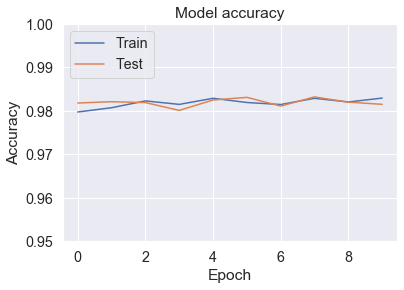

In [ ]:
import matplotlib.pyplot as plt
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.ylim(0.95, 1)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

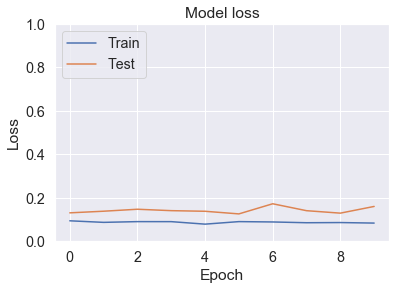

In [ ]:
plt.plot(model_history.history['loss']) 
plt.plot(model_history.history['val_loss']) 
plt.ylim(0.0, 1)
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

### Predicting the Test Data

In [ ]:
# calculate predictions
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(x_test)

In [ ]:
print(predictions[0])
# Converting the predictions[0] into digit value using the np.argmax() function
print("0 index digit in test set is: " ,np.argmax(predictions[0]))

[0.0000000e+00 0.0000000e+00 8.2007466e-30 2.2759999e-35 1.4568416e-29
 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 7.0337766e-26]
0 index digit in test set is:  7


In [ ]:
# Hete we converting the all the predictions result and storing the results in y_pred
y_pred = []
for i in range(len(y_test)):
    y_pred.append(np.argmax(predictions[i]))

In [ ]:
y_pred[0]

7

## Evaluating the final model with different metrics 

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

In [ ]:
print('Accuracy Score :', accuracy_score(y_true=y_test, y_pred=y_pred))
print('Recall Score :', recall_score(y_true=y_test, y_pred=y_pred, average='micro'))
print('Precision Score :', precision_score(y_true=y_test, y_pred=y_pred,average='micro'))

Accuracy Score : 0.9815
Recall Score : 0.9815
Precision Score : 0.9815


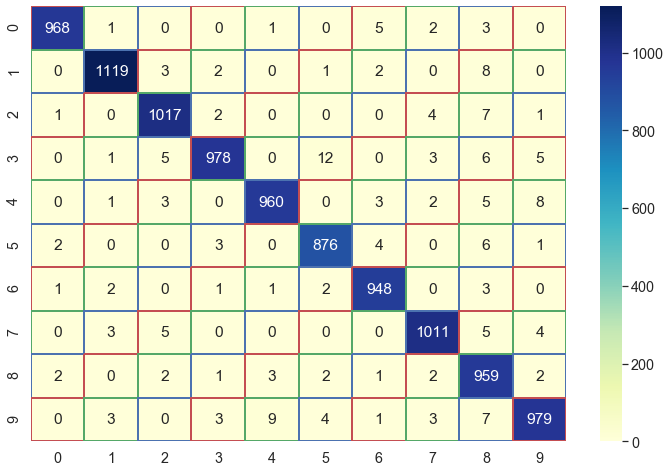

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True,fmt='d',cmap="YlGnBu",linecolor='rgb', linewidths=1);
#sns.set(font_scale=1.8) 

In [ ]:
# true_pred is used to store the number of Right predictions
# false_pred is used to store the number of Wrong predictions
# false_pred_index is used to store the Wrong predictions index values
# here false_pred = len(false_pred_index)

true_pred = 0    # To c
false_pred = 0
false_pred_index = []
for i in range(len(y_test)):
    if y_test[i] == y_pred[i]:
        true_pred= true_pred + 1
    else:
        false_pred = false_pred + 1
        false_pred_index.append(i)
print('Correct prediction', true_pred)
print('Wrong predictions', false_pred)

Correct prediction 9815
Wrong predictions 185


### Tacking one right prediction as a example and Checking

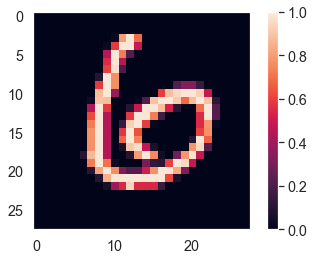

In [ ]:
# checking the 11th index in the x_test
plt.figure()
plt.imshow(x_test[11])
plt.colorbar()
plt.grid()
plt.show()

In [ ]:
# Output's for the 11th index in the x_test
k = 11
if y_test[k] == y_pred[k]:
    print("The Model predicted correctly and the digit is :", y_pred[k] )
else:
    print("The Model predicted Wrongly")
    print("Right Digit is =", y_test[k], "but Model predicted", y_pred[k] )

The Model predicted correctly and the digit is : 6


### Tacking one wrong prediction as a example and Checking

In [ ]:
# Tacking one value from the false_pred_index list
false_pred_index

[149,
 247,
 321,
 340,
 359,
 445,
 448,
 449,
 582,
 659,
 691,
 717,
 720,
 723,
 883,
 900,
 938,
 956,
 1014,
 1032,
 1044,
 1107,
 1112,
 1178,
 1226,
 1232,
 1242,
 1247,
 1260,
 1319,
 1326,
 1328,
 1393,
 1395,
 1522,
 1530,
 1549,
 1553,
 1554,
 1611,
 1621,
 1678,
 1681,
 1717,
 1828,
 1868,
 1901,
 1952,
 2004,
 2024,
 2053,
 2109,
 2129,
 2130,
 2135,
 2162,
 2182,
 2224,
 2237,
 2293,
 2308,
 2369,
 2387,
 2408,
 2488,
 2534,
 2573,
 2597,
 2598,
 2654,
 2713,
 2720,
 2823,
 2877,
 2921,
 2927,
 2939,
 2953,
 3005,
 3060,
 3073,
 3117,
 3225,
 3405,
 3441,
 3475,
 3503,
 3520,
 3549,
 3558,
 3597,
 3767,
 3776,
 3808,
 3811,
 3818,
 3821,
 3906,
 3941,
 3985,
 4007,
 4027,
 4065,
 4075,
 4078,
 4176,
 4224,
 4248,
 4289,
 4369,
 4405,
 4437,
 4443,
 4477,
 4497,
 4536,
 4571,
 4601,
 4635,
 4740,
 4751,
 4823,
 4860,
 4880,
 5078,
 5140,
 5331,
 5457,
 5623,
 5634,
 5642,
 5676,
 5734,
 5936,
 5955,
 5973,
 6011,
 6059,
 6166,
 6173,
 6174,
 6347,
 6555,
 6571,
 6576,
 65

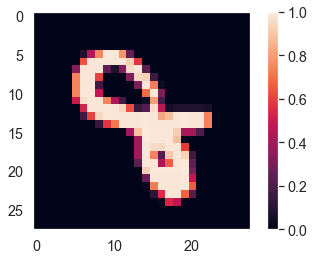

In [ ]:
plt.figure()
plt.imshow(x_test[false_pred_index[10]])
plt.colorbar()
plt.grid()
plt.show()

In [ ]:
k = false_pred_index[10]
if y_test[k] == y_pred[k]:
    print("The Model predicted correctly and the digit is :", y_pred[k] )
else:
    print("The Model predicted Wrongly")
    print("Right Digit is =", y_test[k], "but Model predicted", y_pred[k] )

The Model predicted Wrongly
Right Digit is = 8 but Model predicted 4


In [ ]:
k = false_pred_index[110]
if y_test[k] == y_pred[k]:
    print("The Model predicted correctly and the digit is :", y_pred[k] )
else:
    print("The Model predicted Wrongly")
    print("Right Digit is =", y_test[k], "but Model predicted", y_pred[k] )

The Model predicted Wrongly
Right Digit is = 9 but Model predicted 4


<h2 align='center' style="color:#9a159f;">  Graph this to look at the full set of 10 class predictions. </h2>

In [ ]:
class_names = [0,1,2,3,4,5,6,7,8,9]
def digit_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'green'
        
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
    
def digit_value_bar(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid()
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="red")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')


* Let's plot several images with their predictions.
* Let's look at the several images, predictions, and prediction array. Correct prediction labels are green and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

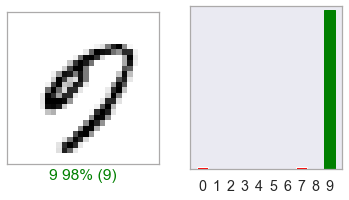

In [ ]:
# Plotting for one digit
i = 4163
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
digit_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
digit_value_bar(i, predictions[i],  y_test)
plt.show()

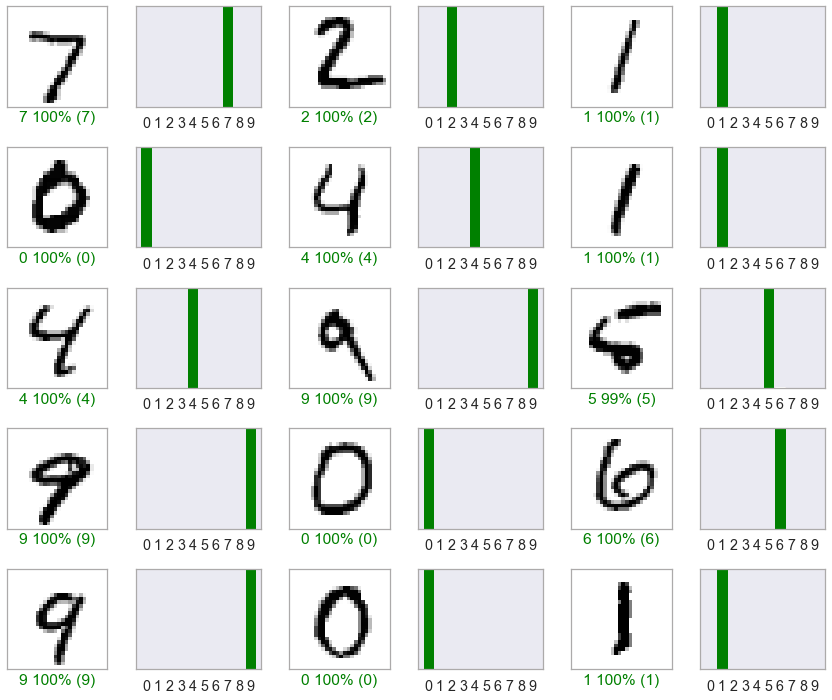

In [ ]:
import matplotlib
matplotlib.rc('axes',edgecolor='#acaaaa')
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in green and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  digit_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  digit_value_bar(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

### WE ARE GETTING TRAINING ACCURACY OF 98% AND TESTING ACCURACY OF 98